<a href="https://colab.research.google.com/github/SubhashShanmuka/SAS/blob/main/GEN_BUS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files  # This is for Google Colab or similar environments
uploaded = files.upload()

# If you're using Colab or Jupyter Notebook, you can then load it into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Preview the data
df.head()


Saving MEANS_STATS0003.csv to MEANS_STATS0003 (2).csv


,Weekday,Season,_TYPE_,_FREQ_,Ride_Count_Mean,Ride_Count_StdDev,Ride_Count_LCLM,Ride_Count_UCLM
0,Monday,Fall,1,26,28419.96154,5416.054309,26232.36986,30607.55322
1,Monday,Spring,1,26,25983.61539,5494.487944,23764.34368,28202.88709
2,Monday,Summer,1,27,32387.44444,7447.029823,29441.49756,35333.39133
3,Monday,Winter,1,26,20990.96154,4067.197251,19348.18502,22633.73806
4,Tuesday,Fall,1,26,30374.96154,5822.312657,28023.27856,32726.64451


<ipython-input-5-0f13d51456a8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Ride_Count_Mean', y='Weekday', inner='stick', palette='Dark2')


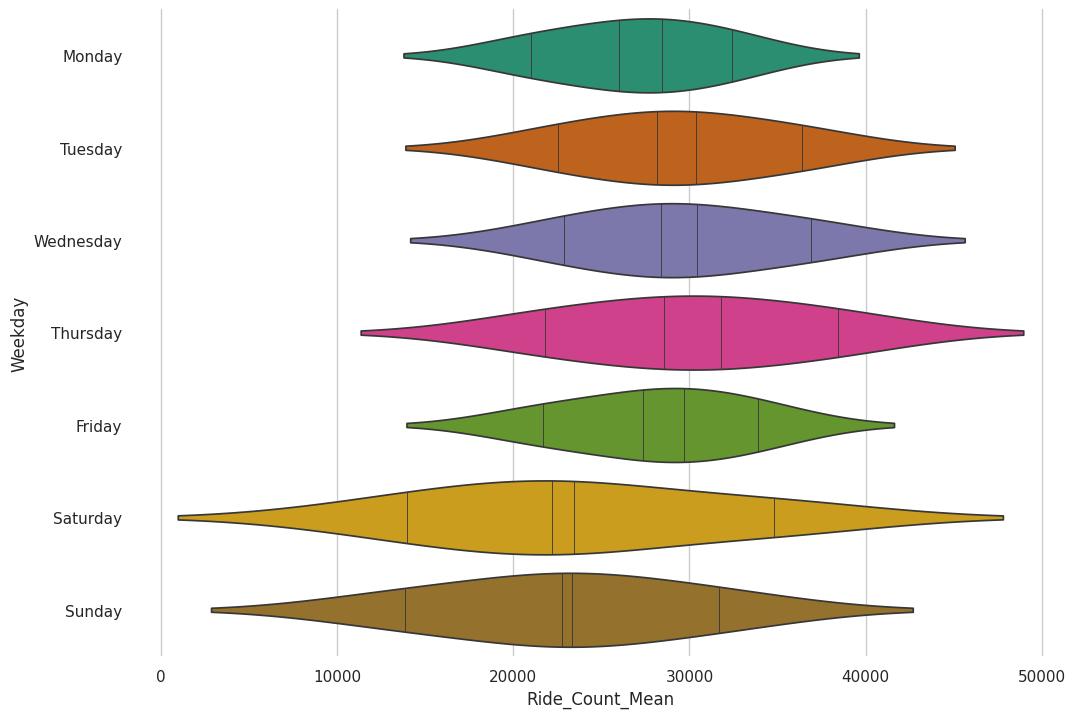

In [ ]:
# @title Weekday vs Ride_Count_Mean

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Weekday'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Ride_Count_Mean', y='Weekday', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

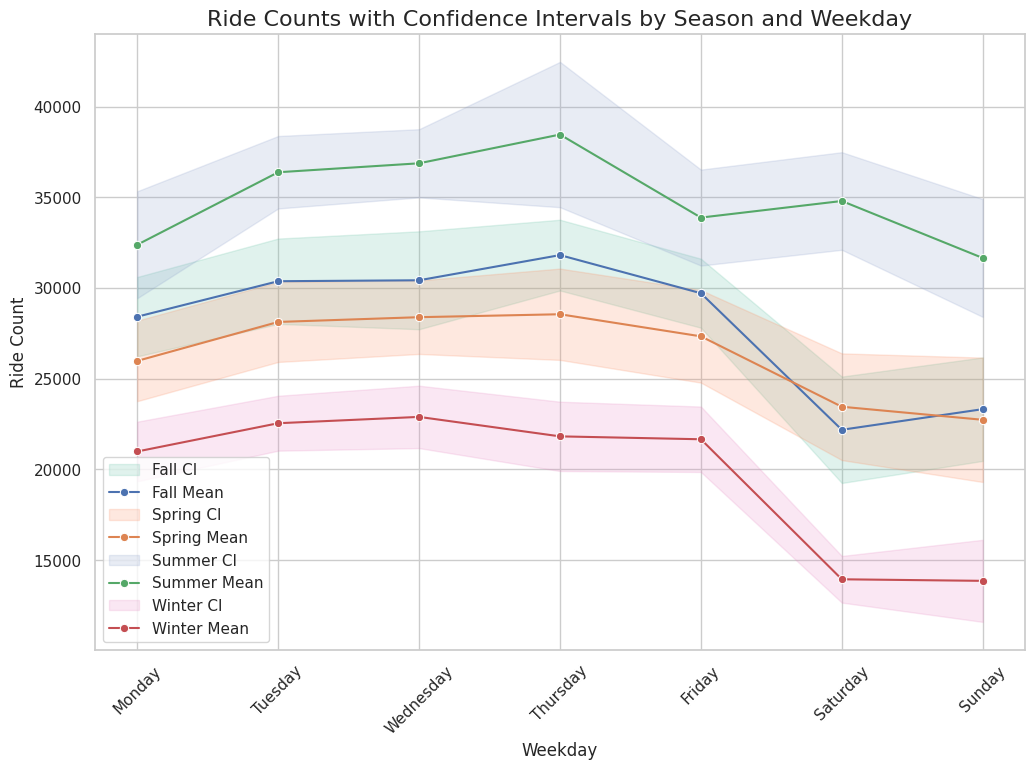

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through each season to create individual line plots
for season in df['Season'].unique():
    # Filter the data for the current season
    season_data = df[df['Season'] == season]

    # Create the ribbon plot for the current season
    plt.fill_between(season_data['Weekday'],
                     season_data['Ride_Count_LCLM'],
                     season_data['Ride_Count_UCLM'],
                     alpha=0.2, label=f'{season} CI', color=sns.color_palette("Set2")[df['Season'].unique().tolist().index(season)])

    # Plot the mean line for each season
    sns.lineplot(x='Weekday', y='Ride_Count_Mean', data=season_data, label=f'{season} Mean', marker='o')

# Add titles and labels
plt.title('Ride Counts with Confidence Intervals by Season and Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Ride Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Display the plot
plt.show()


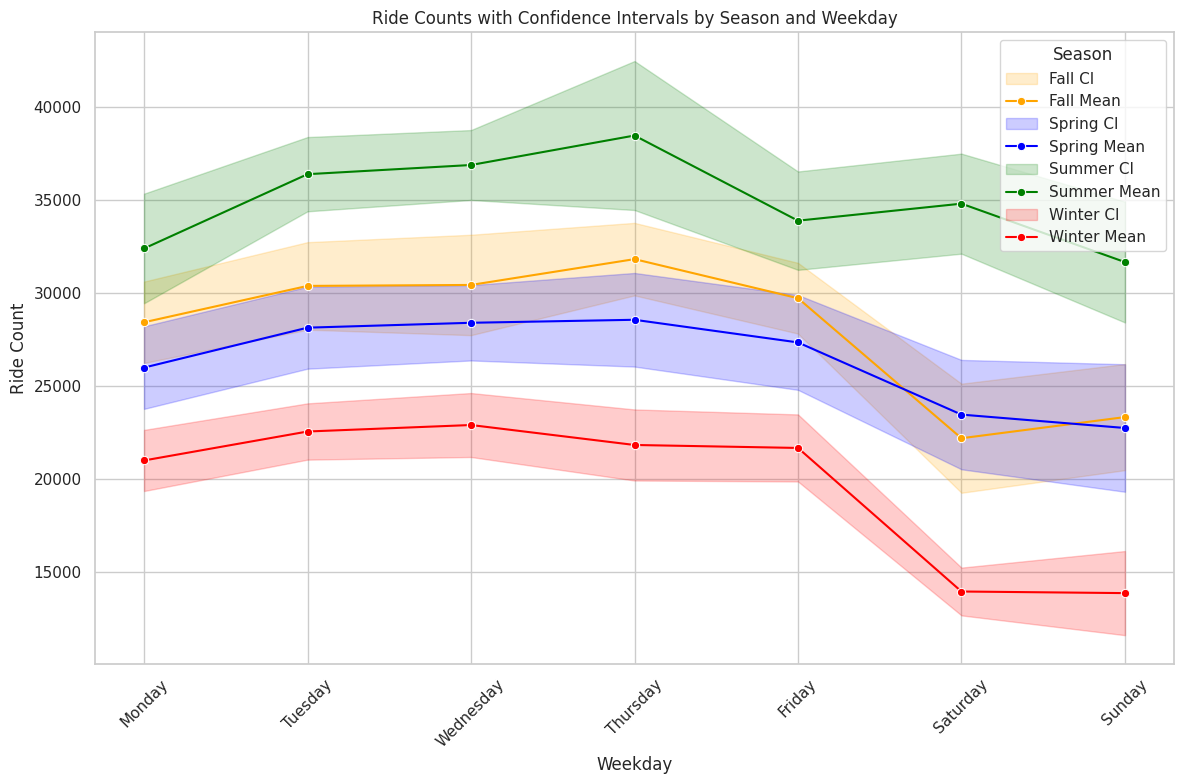

In [ ]:
# Map weekdays to numerical values for plotting
weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mapping
df['Weekday_num'] = df['Weekday'].map(weekday_mapping)

# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Define colors for each season to match the example
season_colors = {
    'Fall': 'orange',
    'Spring': 'blue',
    'Summer': 'green',
    'Winter': 'red'
}

# Plot the ribbon and mean for each season
for season in df['Season'].unique():
    subset = df[df['Season'] == season]

    # Plot the ribbon (confidence interval) with season-specific colors
    plt.fill_between(subset['Weekday_num'], subset['Ride_Count_LCLM'], subset['Ride_Count_UCLM'],
                     color=season_colors[season], alpha=0.2, label=f"{season} CI")

    # Plot the mean line with the same season-specific color
    sns.lineplot(x='Weekday_num', y='Ride_Count_Mean', data=subset, color=season_colors[season], label=f"{season} Mean", marker='o')

# Customize the plot
plt.title("Ride Counts with Confidence Intervals by Season and Weekday")
plt.xlabel("Weekday")
plt.ylabel("Ride Count")

# Set weekday labels on x-axis
plt.xticks(ticks=list(weekday_mapping.values()), labels=list(weekday_mapping.keys()), rotation=45)

# Add legend and tight layout for better spacing
plt.legend(title="Season")
plt.tight_layout()

# Show the plot
plt.show()

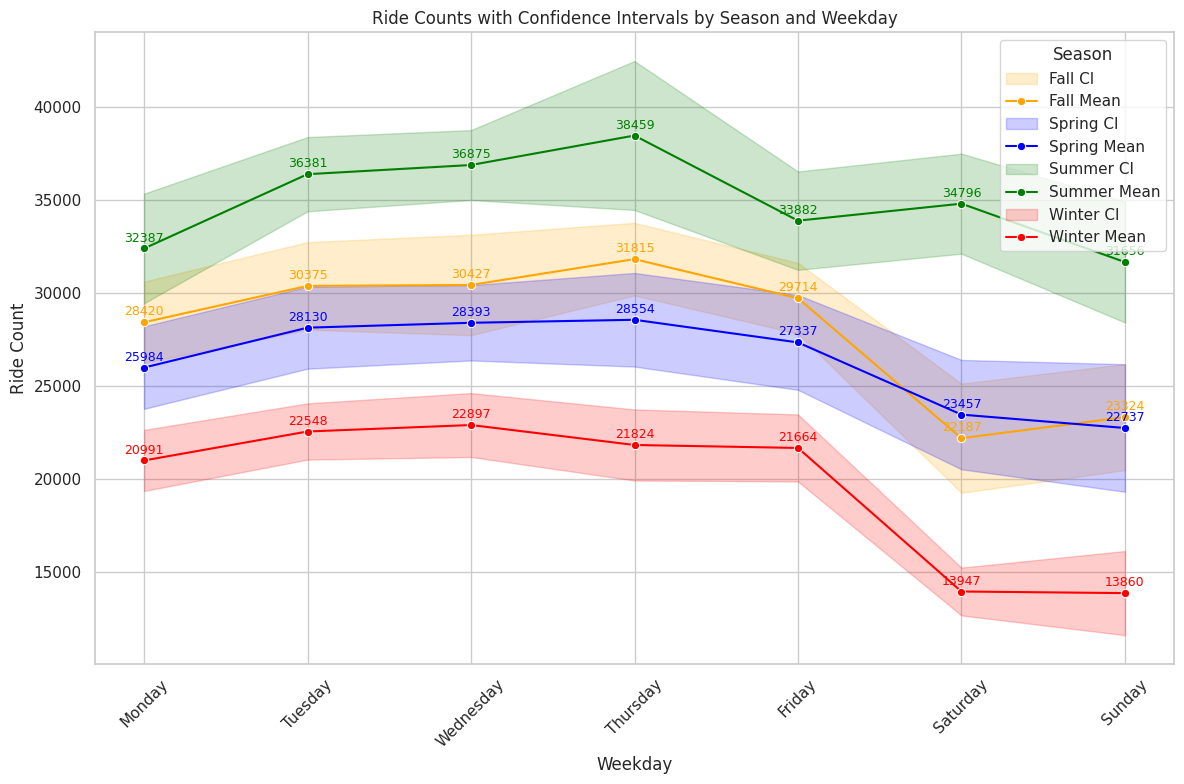

In [ ]:
# Map weekdays to numerical values for plotting
weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mapping
df['Weekday_num'] = df['Weekday'].map(weekday_mapping)

# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Define colors for each season to match the example
season_colors = {
    'Fall': 'orange',
    'Spring': 'blue',
    'Summer': 'green',
    'Winter': 'red'
}

# Plot the ribbon and mean for each season
for season in df['Season'].unique():
    subset = df[df['Season'] == season]

    # Plot the ribbon (confidence interval) with season-specific colors
    plt.fill_between(subset['Weekday_num'], subset['Ride_Count_LCLM'], subset['Ride_Count_UCLM'],
                     color=season_colors[season], alpha=0.2, label=f"{season} CI")

    # Plot the mean line with the same season-specific color
    sns.lineplot(x='Weekday_num', y='Ride_Count_Mean', data=subset, color=season_colors[season], label=f"{season} Mean", marker='o')

    # Add data labels for each point
    for i in range(len(subset)):
        plt.annotate(f"{subset['Ride_Count_Mean'].iloc[i]:.0f}",
                     (subset['Weekday_num'].iloc[i], subset['Ride_Count_Mean'].iloc[i]),
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color=season_colors[season])

# Customize the plot
plt.title("Ride Counts with Confidence Intervals by Season and Weekday")
plt.xlabel("Weekday")
plt.ylabel("Ride Count")

# Set weekday labels on x-axis
plt.xticks(ticks=list(weekday_mapping.values()), labels=list(weekday_mapping.keys()), rotation=45)

# Add legend and tight layout for better spacing
plt.legend(title="Season")
plt.tight_layout()

# Show the plot
plt.show()

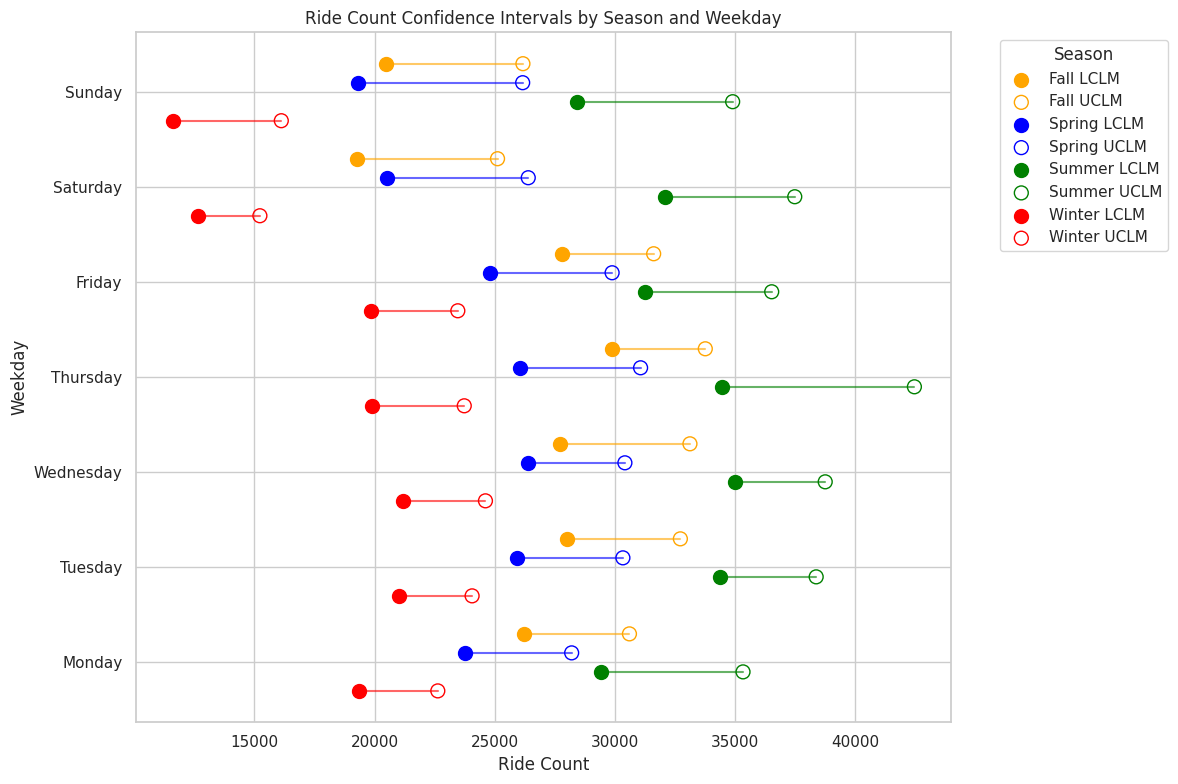

In [ ]:
# Map weekdays to numerical values for plotting
weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mapping
df['Weekday_num'] = df['Weekday'].map(weekday_mapping)

# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Define colors for each season to differentiate dumbbell points
season_colors = {
    'Fall': 'orange',
    'Spring': 'blue',
    'Summer': 'green',
    'Winter': 'red'
}

# Define vertical offset for seasons to spread them out on the y-axis
season_offset = {
    'Fall': 0.3,
    'Spring': 0.1,
    'Summer': -0.1,
    'Winter': -0.3
}

# Create the dumbbell plot for each season
for season in df['Season'].unique():
    subset = df[df['Season'] == season]

    # Plot the dumbbell line for each weekday with vertical offset for the season
    for i in range(len(subset)):
        y_value = subset['Weekday_num'].iloc[i] + season_offset[season]  # Apply the vertical offset

        # Plot the dumbbell line connecting LCLM and UCLM
        plt.plot([subset['Ride_Count_LCLM'].iloc[i], subset['Ride_Count_UCLM'].iloc[i]],
                 [y_value, y_value],
                 color=season_colors[season], alpha=0.6)

        # Plot the left point (LCLM)
        plt.scatter(subset['Ride_Count_LCLM'].iloc[i], y_value,
                    color=season_colors[season], s=100, label=f"{season} LCLM" if i == 0 else "")

        # Plot the right point (UCLM)
        plt.scatter(subset['Ride_Count_UCLM'].iloc[i], y_value,
                    facecolors='none', edgecolors=season_colors[season], s=100, label=f"{season} UCLM" if i == 0 else "")

# Customize the plot
plt.title("Ride Count Confidence Intervals by Season and Weekday")
plt.xlabel("Ride Count")
plt.ylabel("Weekday")

# Set weekday labels on y-axis
plt.yticks(ticks=list(weekday_mapping.values()), labels=list(weekday_mapping.keys()))

# Add legend and tight layout for better spacing
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()